## Time Series Pattern Plotting
### Extreme Weather in the City of Perth, Australia in 2023

In [526]:
# import libaries
import os
import folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from calendar import month_abbr

### 1. Mark Target Weather Stations on Map

In [527]:
# Pin the target weather stations in perth on map using folium
hash_perth = '037e6a0b7236fd24ae99b4f271f3602408953c052bacce7622883c01'
station_dic = pd.read_csv('/Users/rootx/Downloads/BinSize_d400.csv')
station_locations_by_hash = station_dic[station_dic['hash'] == hash_perth]

# get list of longitude and lattitude
lons = station_locations_by_hash['LONGITUDE'].tolist()
lats = station_locations_by_hash['LATITUDE'].tolist()
target_station = station_locations_by_hash['ID'].tolist()

# plot on folium map
map_perth = folium.Map(location = [lats[0], lons[0]], height = 500,  zoom_start = 10)
for lat, lon in zip(lats, lons):
    folium.Marker([lat, lon]).add_to(map_perth)

# display map in Jupyter
display(map_perth)

### 2. Extract Data from NCEI
* Extract the dataset from NCEI with target station's IDs.
* Transform the data into Celsius.
* Check missing values and range.

In [482]:
url_prefix = 'https://www.ncei.noaa.gov/data/global-historical-climatology-network-daily/access/'
# define what columns are going to be saved
cols = ['STATION','DATE','NAME','TMAX','TMIN']
df_raw = pd.DataFrame(columns=cols)

# using loop to turn all csv file into dataframe with pre-defined cols
for i in target_station:
    df_new=[]
    url = os.path.join(url_prefix,(i +'.csv'))
    df_new = pd.read_csv(url)
    df_new = df_new[df_new['DATE']>='2000']
    df_new = df_new[cols]
    df_raw = pd.concat([df_raw, df_new])

/var/folders/58/_rx55hjj6x94rc6szlzrj2w80000gn/T/ipykernel_35796/3401031929.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_raw = pd.concat([df_raw, df_new])


In [553]:
df_raw

,STATION,DATE,NAME,TMAX,TMIN,tmax_C,tmin_C,year,month,day
20460,ASN00009021,2000-01-01,"PERTH AIRPORT, AS",365.0,207.0,36.5,20.7,2000,01,01
20461,ASN00009021,2000-01-02,"PERTH AIRPORT, AS",372.0,210.0,37.2,21.0,2000,01,02
20462,ASN00009021,2000-01-03,"PERTH AIRPORT, AS",363.0,183.0,36.3,18.3,2000,01,03
20463,ASN00009021,2000-01-04,"PERTH AIRPORT, AS",374.0,197.0,37.4,19.7,2000,01,04
20464,ASN00009021,2000-01-05,"PERTH AIRPORT, AS",372.0,228.0,37.2,22.8,2000,01,05
...,...,...,...,...,...,...,...,...,...,...
11382,ASN00009225,2023-12-27,"PERTH METRO, AS",258.0,171.0,25.8,17.1,2023,12,27
11383,ASN00009225,2023-12-28,"PERTH METRO, AS",299.0,180.0,29.9,18.0,2023,12,28
11384,ASN00009225,2023-12-29,"PERTH METRO, AS",323.0,173.0,32.3,17.3,2023,12,29
11385,ASN00009225,2023-12-30,"PERTH METRO, AS",352.0,182.0,35.2,18.2,2023,12,30


In [487]:
# transform the data into Celsius, get date column separated
df_raw['tmax_C']=df_raw['TMAX']/10
df_raw['tmin_C']=df_raw['TMIN']/10
df_raw['year'] = df_raw['DATE'].apply(lambda x: x.split('-')[0])
df_raw['month'] = df_raw['DATE'].apply(lambda x: x.split('-')[1])
df_raw['day'] = df_raw['DATE'].apply(lambda x: x.split('-')[2])

In [498]:
# basic checks
df=df_raw[df_raw['year']>='2013']
df=df[['STATION','NAME','DATE','year','month','day','tmax_C','tmin_C']]

# check mising value -> no impacts on this topic as we only focus on records before 2024
mask1 = df['tmax_C'].isnull()==True
mask2 = df['tmin_C'].isnull()==True
df[mask1 & mask2]

,STATION,NAME,DATE,year,month,day,tmax_C,tmin_C
29288,ASN00009021,"PERTH AIRPORT, AS",2024-03-03,2024,03,03,NaN,NaN
29310,ASN00009021,"PERTH AIRPORT, AS",2024-03-25,2024,03,25,NaN,NaN
29313,ASN00009021,"PERTH AIRPORT, AS",2024-04-01,2024,04,01,NaN,NaN
29330,ASN00009021,"PERTH AIRPORT, AS",2024-04-18,2024,04,18,NaN,NaN
29351,ASN00009021,"PERTH AIRPORT, AS",2024-05-10,2024,05,10,NaN,NaN
29362,ASN00009021,"PERTH AIRPORT, AS",2024-05-21,2024,05,21,NaN,NaN
29372,ASN00009021,"PERTH AIRPORT, AS",2024-05-31,2024,05,31,NaN,NaN
29375,ASN00009021,"PERTH AIRPORT, AS",2024-06-03,2024,06,03,NaN,NaN
29377,ASN00009021,"PERTH AIRPORT, AS",2024-06-05,2024,06,05,NaN,NaN
29390,ASN00009021,"PERTH AIRPORT, AS",2024-06-18,2024,06,18,NaN,NaN


In [509]:
# check data range/outlier
df.describe()

,tmax_C,tmin_C
count,12210.000000,12170.000000
mean,24.976609,13.371134
std,6.102238,4.719695
min,10.800000,-0.600000
25%,20.100000,10.000000
50%,23.900000,13.400000
75%,29.200000,16.800000
max,44.600000,29.700000


### 3. Data Processing for Shaded Area and Extreme Records
* Fetch the min and max data for each day of the year between the years 2000 and 2022 across all weather stations. 
* Find out when the min or max temperature in 2023 falls below the min or rises above the max for the previous decade.

* Note: records for 29 Feb will be dropped for data consistency

In [489]:
# create a DataFrame of maximum temperature by date
# create a DataFrame of minimum temperatures by date

df = df[~((df['month']=='02') & (df['day']=='29'))]

tmax = df[['STATION','NAME','DATE','year','month','day','tmax_C']]
tmin = df[['STATION','NAME','DATE','year','month','day','tmin_C']]

In [490]:
# get the x-axis column month-day
tmax['mon_day'] = tmax['DATE'].apply(lambda x: x[-5:])
tmin['mon_day'] = tmin['DATE'].apply(lambda x: x[-5:])

# calculate the minimum and maximum values for the day of the year for 2000 through 2022
tmax_his = tmax[ (tmax['year'] >= '2000') & (tmax['year'] < '2023')]
tmin_his = tmin[ (tmin['year'] >= '2000') & (tmin['year'] < '2023')]
tmax_his_b = tmax_his.groupby('mon_day').agg({'tmax_C':'max'})
tmin_his_b = tmin_his.groupby('mon_day').agg({'tmin_C':'min'})

# calculate the minimum and maximum values for the year 2023
tmax_23 = tmax[ tmax['year'] == '2023']
tmin_23 = tmin[ tmin['year'] == '2023']
tmax_23_b = tmax_23.groupby('mon_day').agg({'tmax_C':'max'})
tmin_23_b = tmin_23.groupby('mon_day').agg({'tmin_C':'min'})

In [491]:
# get record high and record low scatters

# reset index
tmax_23_b=tmax_23_b.reset_index()
tmin_23_b=tmin_23_b.reset_index()

# get record date-value pairs
records_high=[]
max_value=[]
for i in range(tmax_23_b.shape[0]):
    for j in range(tmax_his_b.shape[0]):
        if tmax_23_b['mon_day'].iloc[i] == tmax_his_b.index[j] and tmax_23_b['tmax_C'].iloc[i] > tmax_his_b['tmax_C'].iloc[j]:
            records_high.append(tmax_23_b['mon_day'].iloc[i])
            max_value.append(tmax_23_b['tmax_C'].iloc[i])

records_low=[]
min_value=[]
for i in range(tmin_23_b.shape[0]):
    for j in range(tmin_his_b.shape[0]):
        if tmin_23_b['mon_day'].iloc[i] == tmin_his_b.index[j] and tmin_23_b['tmin_C'].iloc[i] < tmin_his_b['tmin_C'].iloc[j]:
            records_low.append(tmin_23_b['mon_day'].iloc[i])
            min_value.append(tmin_23_b['tmin_C'].iloc[i])

# save them into dataframe
max_sct = pd.DataFrame({'mon_day':records_high,'tmax_C':max_value})
min_sct = pd.DataFrame({'mon_day':records_low,'tmin_C':min_value})

### Time Series Weather Pattern Plotting
* Shaded area -> two line plots
* Records -> two scatter plots

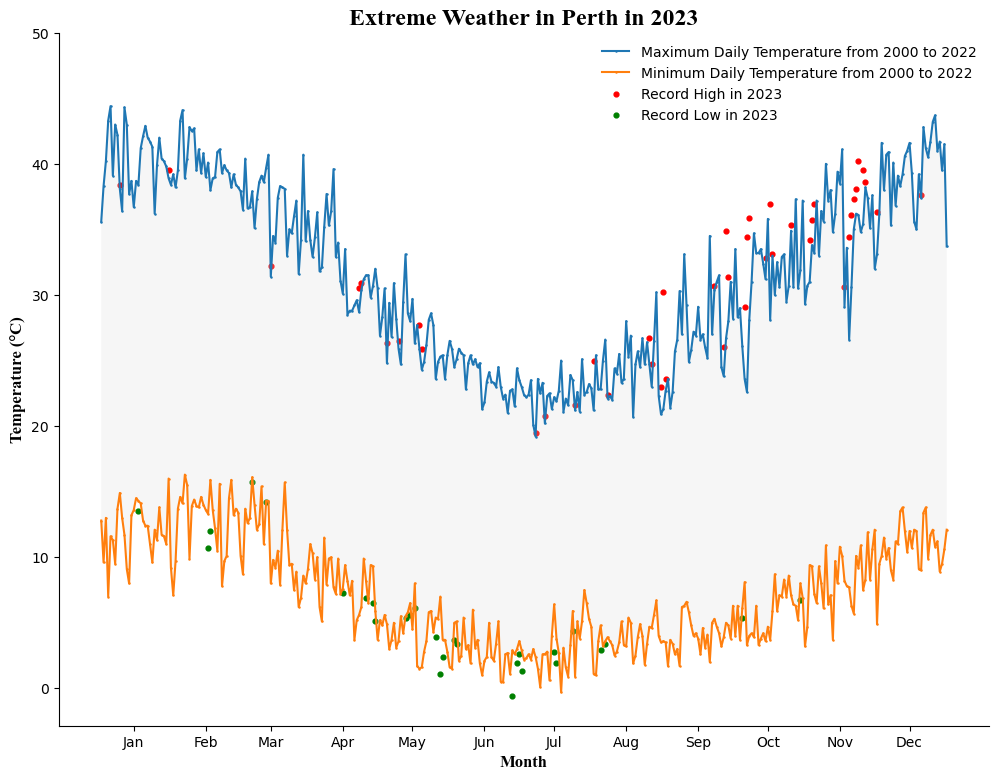

In [551]:
plt.figure(figsize=(12,9))

# line plot (history records) and scatter (new records in 2023)
x_date = tmax_23_b['mon_day']
plt.plot(x_date,tmax_his_b['tmax_C'],'-o',x_date,tmin_his_b['tmin_C'],'-o',markersize=0.8)
plt.scatter(max_sct['mon_day'],max_sct['tmax_C'], s=12, c='red', alpha=1)
plt.scatter(min_sct['mon_day'],min_sct['tmin_C'], s=12, c='green',alpha=1)

# set title and lables
plt.title('Extreme Weather in Perth in 2023',fontsize='xx-large', fontweight='bold', fontname='Times New Roman')
plt.xlabel('Month',fontname='Times New Roman', fontweight='bold', fontsize='large')
plt.ylabel('Temperature (°C)',fontname='Times New Roman', fontweight='bold', fontsize='large')
plt.ylim(top=50)

# set legend on the top right corner
plt.legend(['Maximum Daily Temperature from 2000 to 2022',
            'Minimum Daily Temperature from 2000 to 2022',
           'Record High in 2023',
           'Record Low in 2023'],
           frameon=False,
           loc=1)

# get rid of the top and right frames
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

# create shaded area
plt.gca().fill_between(range(len(x_date)),
                       tmax_his_b['tmax_C'], tmin_his_b['tmin_C'],
                       facecolor='lightgrey',
                       alpha=0.2)


# set xticks (display month in the middle)
plt.xticks(['01-15','02-15','03-15','04-15','05-15','06-15','07-15',
            '08-15','09-15','10-15','11-15','12-15'],month_abbr[1:13]);
fig = plt.gcf()

In [549]:
# save fig into current working directory
fig.savefig('extreme_weather_Perth2023.png', dpi=300)